In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')

df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0


In [42]:
# '성별', '신장', '심혈관질환', '체중', '흡연여부','연령','직업', '혈액형','재발여부'
# 열 단위 추출 
# df_ROS[['성별', '신장', '심혈관질환', '체중', '흡연여부','연령','직업', '혈액형','재발여부']]
df_ROS_forpatient = df_ROS[['성별', '신장', '심혈관질환', '체중', '흡연여부','연령','직업', '혈액형','재발여부']]
# df_ROS_forpatient.head(2)
df_ROS_forpatient.tail(3)

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1891,1,167,0,70.0,0,61,무직,RH+O,0
1892,1,177,0,77.0,0,29,사무직,RH+A,0
1893,2,168,0,49.0,0,30,사무직,RH+AB,0


In [43]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


In [44]:
## 전처리: 대상 컬럼 의한 레코드 삭제시 dataset 양 고려
## df_ROS_forpatient.isnull().sum()
## 머신러닝에서는 비어있는 값을 되도록 채워야한다. 
## 통계에서는 삭제
df_ROS_forpatient = df_ROS_forpatient.dropna()
df_ROS_forpatient.isnull().sum()

성별       0
신장       0
심혈관질환    0
체중       0
흡연여부     0
연령       0
직업       0
혈액형      0
재발여부     0
dtype: int64

### 상관관계 확인
- 목표변수 : '재발여부' - 분포 언발런스 (연속형: 정규화 확인, 범주형 : 밸런스 확인)
- 설명변수 : 
  - '성별', : 남성 발생율 높은 것 같다. 
  - '신장', : 목표변수 대비 분포 변화 적응 
  - '심혈관질환', : 질환자는 재발율 상대적으로 높다. 
  - '체중', : 체중 차이 따라 분포 변화 영향을 줌 
  - '흡연여부', : 흡연자 재발율 상대적으로 높다.  
  - '연령', : 상대적으로 연령 높을수로 발생률 높은 것으로 보임
  - '직업', : 건설업/ 수산업자 직군 발생율이 높다. 
  - '혈액형' : 차이에 여부 확인 필요(확증 데이터 분석)
  
- 분석 스토리 :   

<Axes: xlabel='재발여부', ylabel='count'>

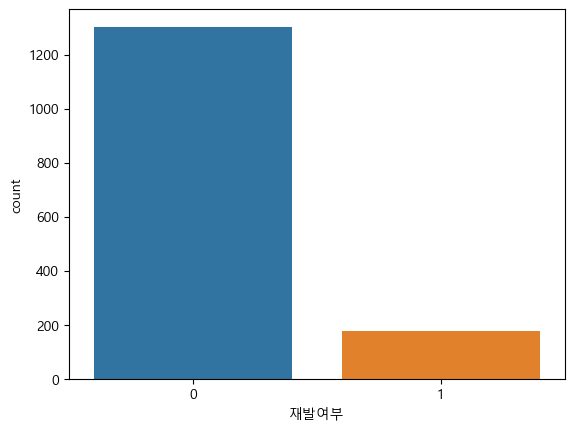

In [45]:
### 데이터 타입과 분포
## 목표 변수 : 
sns.countplot(data=df_ROS_forpatient, x='재발여부')

In [46]:
# object 변환 대상 : 성별
# df_ROS_forpatient ['심혈관질환'].value_count()
df_ROS_forpatient[['성별', '심혈관질환', '흡연여부', '재발여부']] = df_ROS_forpatient[['성별', '심혈관질환', '흡연여부', '재발여부']].astype(object) # 데이터 변환
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   object 
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   object 
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   object 
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 115.5+ KB


In [47]:
forpatient_list = df_ROS_forpatient.describe().columns.to_list()# 연속형 확인
forpatient_list

['신장', '체중', '연령']

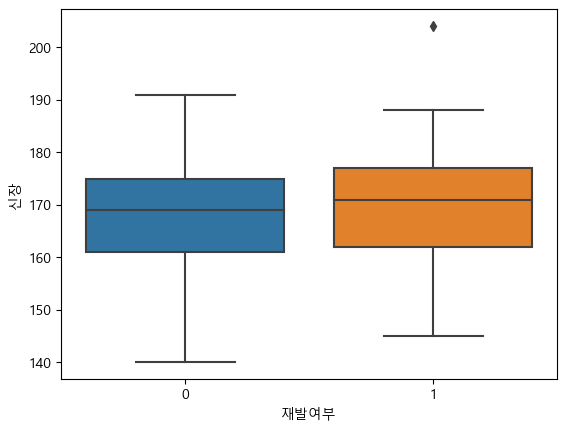

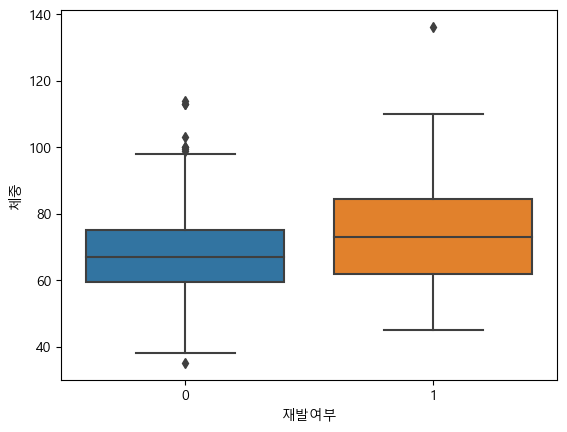

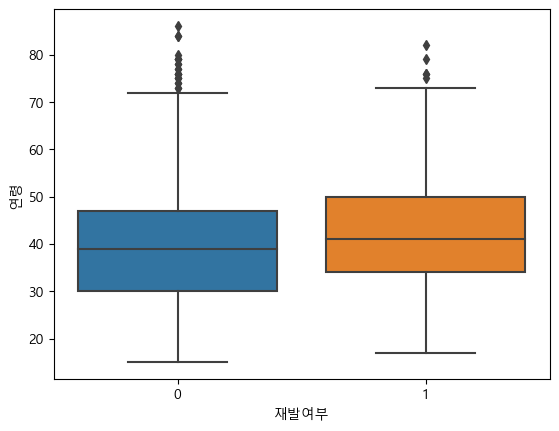

In [48]:
## x:연속형 / y: 범주형
for item in forpatient_list :
    sns.boxplot(data=df_ROS_forpatient, x='재발여부', y=item)
    plt.show()

In [49]:
# df_ROS_forpatient.describe(include=object) # 범주형 확인 
# df_ROS_forpatient.drop(columns=['재발여부']) # drop
forpatient_object_list= df_ROS_forpatient.describe(include=object).drop(columns=['재발여부']).columns.to_list()
forpatient_object_list

# 재발여부는 목표변수여서 그래프 안그려도 되기때문에 drop

['성별', '심혈관질환', '흡연여부', '직업', '혈액형']

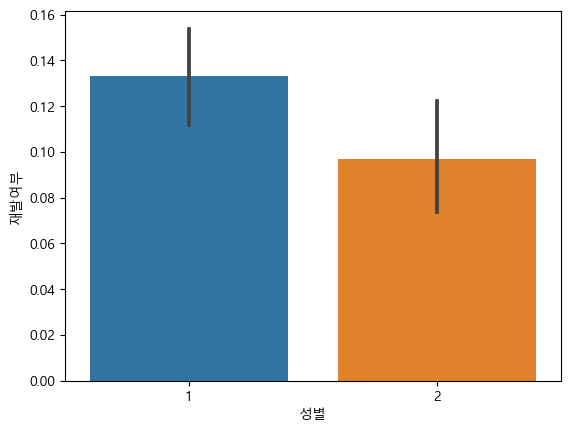

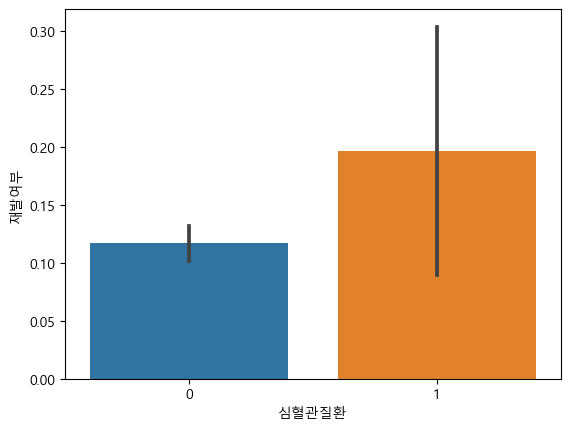

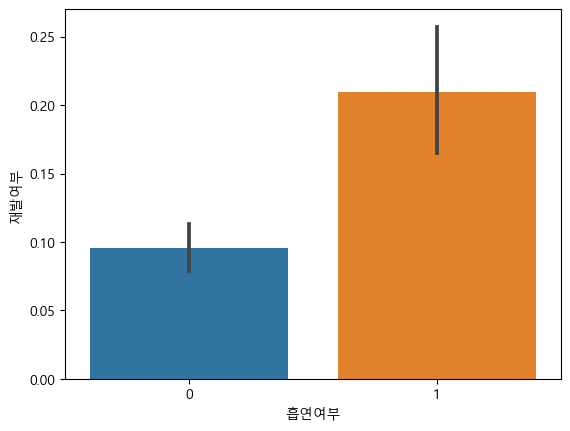

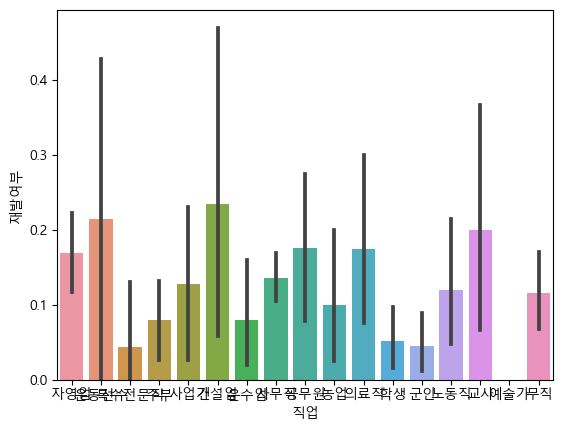

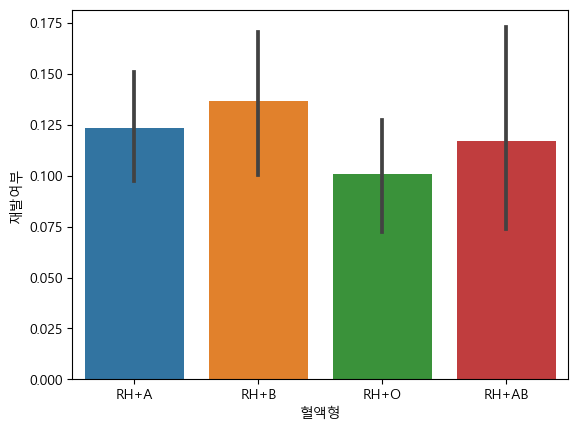

In [53]:
## sns.barplot(data=df_ROS_forpatient, x=item, y='재발여부', orient='h')

for item in forpatient_object_list :
    sns.barplot(data=df_ROS_forpatient, x=item, y='재발여부')
    plt.show()